# Apresentação:

O objetivo desse código é estudar iniciar os estudos sobre **Redes Neurais**, começando aqui com um modelo para **Classificação**, classificação de multiplas classes, para ser mais exato. O conjunto de dados utilizados aqui será o [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) que é um *dataset* *MNIST-like* e o código será construído mesclando teoria e prática.

## Material Base:

* **Hands On Machine Learning with Scikit-Learn, Keras & TensorFlow** de *Aurélien Géron*;
* **Understanding Deep Learning** de *Simon J.D. Prince*;
* **Neural Networks and Learning Machines** de *Simon Haykin*.

In [1]:
# Importando dados:
from sklearn.datasets import load_iris

# Bibliotecas para Gráficos:
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Instanciando conjunto de dados:
iris = load_iris();iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# Perceptron (*Rosenblatt’s Perceptron*):

O **perceptron** é a forma mais simples de uma rede neural, um modelo não linear, usada para a **classificação** de padrões que se dizem **linearmente separáveis** (ou seja, padrões que estão em lados opostos de um **hiperplano**). Ele construído em torno de um único neurônio é limitado a realizar a classificação de padrões com apenas **duas classes** (hipóteses).

## Definição Matemática:

O **perceptron de _Rosenblatt_** é construído em torno de um **neurônio não linear**, (o modelo de neurônio de *McCulloch–Pitts*) e é modelado de modo que,

$$v(n) = \sum_{u=i}^m w_i(n)x_i +b(n) = \textbf{w}^T(n)$$

onde,
* $w_i$ são os pesos, sendo $w \in [0,1]$;
* $x_i$ as caracteristicas, as variáveis em questão, que treinaram o modelo;
* $b$  o vetor de viéses.

$$y = \phi(v)= \phi(\sum_{u=i}^m w_i(n)x_i +b(b))$$


In [3]:
# Bibliotecas utilizadas:
import numpy as np
from sklearn.linear_model import Perceptron

# Bibliotecas Gráficas:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Separando Elementos:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int64) # Iris Setosa

print(X.shape,y.shape)

(150, 2) (150,)


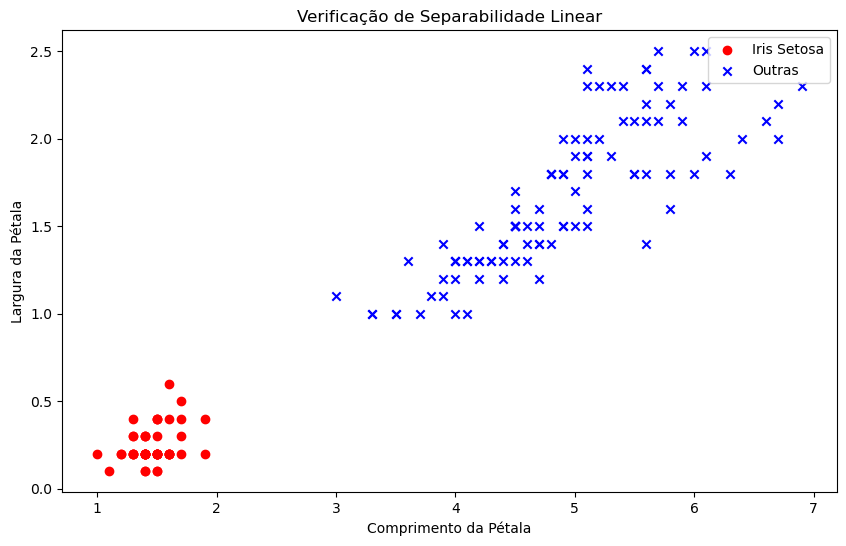

In [5]:
# Avaliando se os dados são linearmente separaveis:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', marker='o', label='Iris Setosa')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', marker='x', label='Outras')
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.legend()
plt.title('Verificação de Separabilidade Linear')
plt.show()

In [6]:
# Splitando os dados:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Insanciando Classe:
per_clf = Perceptron()

# Treinando Modelo:
per_clf.fit(X_train, y_train)

Perceptron()

In [9]:
# Predição:
y_pred = per_clf.predict(X_test);y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
# Bibliotecas de Avaliação do Modelo:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0


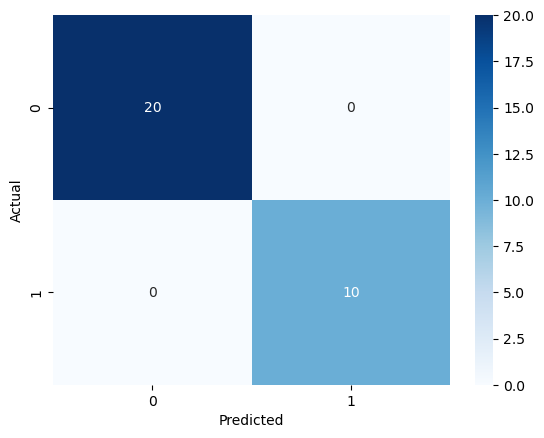

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Multilayer Perceptron:

**Multilayer Perceptron (MLP)** nada mais é do que um encadeamento de perceptrons com a possibilidade de funções de ativação diferentes.

Aqui implementaremos o modelo com Keras e Tensorflow.

* https://keras.io/api/

In [13]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


## Construindo um classificador de Imagem:

Para a tarefa, iremos utilizar o **Fashion MNIST**, que é um substituto substituição do **MNIST**. Tem exatamente o mesmo formato que o **MNIST** (70.000 imagens em tons de cinzento de 28×28 pixéis cada, com 10 classes), mas as mas as imagens representam artigos de moda em vez de dígitos manuscritos, pelo que cada classe é mais cada classe é mais diversificada e o problema acaba por ser significativamente mais difícil do que o **MNIST**. Por exemplo, um modelo linear simples atinge cerca de $92$% de precisão na **MNIST**, mas apenas cerca de $83$% no **Fashion MNIST**.

### Usando o Keras para carregar o conjunto de dados:

O Keras fornece algumas funções utilitárias para buscar e carregar conjuntos de dados comuns, incluindo **MNIST**, **Fashion MNIST**, o conjunto de dados original **California housing** e muito mais. Vamos carregar MNIST de moda:

In [14]:
# Importando dados:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

Ao carregar a **MNIST** ou a **Fashion MNIST** utilizando o Keras em vez do Scikit-Learn, uma diferença importante é que cada imagem é representada como uma matriz $28 \times 28$ em vez de uma vetor de tamanho $784$. Além disso, as intensidades dos píxeis são representadas como números inteiros (de $0$ a $255$) em vez de floats (de $0.0$ a $255.0$). Eis a forma e o tipo de dados do conjunto de treino:

In [15]:
# Shape dos dados:
print(X_train_full.shape,X_train_full.dtype)

(60000, 28, 28) uint8


In [16]:
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


**Conjunto Validação:**

Note-se que o conjunto de dados já está dividido num **conjunto de treino** e num **conjunto de teste**, mas não existe um **conjunto de validação**, por isso vamos criar um. **Conjunto validação** não é uma ideia muito utilizada em *Machine Learning*, mas é uma ideia bastante utilizada em *Deep Learning*, sendo basicamente utilizado para monitorar o desempenho do modelo durante o treinamento e ajudar a detectar overfitting.


Além disso, como vamos treinar a rede neural neural usando **Gradient Descent**, precisamos dimensionar os recursos de entrada. Para simplificar, apenas escalamos as intensidades dos pixels para a faixa, intervalo, de [0,1], dividindo-as por 255.0 (isso também as converte em floats):):


In [17]:
# Criando conjunto de validação: 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 # Escalonando entre 0 e 1
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Até onde busquei, o Fashion MNIST não possui o nome das classes, porém, podemos busca-los no site do [Keras](https://keras.io/api/datasets/fashion_mnist/)

* https://keras.io/api/datasets/fashion_mnist/

In [18]:
# Nome das Classes:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Classes:
classes = list(set(y_train));classes

# Verificando Classes:
for i in classes:
    print(f'{i} -> {class_names[y_train[i]]}')

0 -> Coat
1 -> T-shirt/top
2 -> Sneaker
3 -> Ankle boot
4 -> Ankle boot
5 -> Ankle boot
6 -> Coat
7 -> Coat
8 -> Dress
9 -> Coat


# Construindo o modelo usando a API sequencial:

In [19]:
# Instanciando Modelo:
model = keras.models.Sequential()

# Adicionando camadas:
model.add(keras.layers.Flatten(input_shape=X_train_full.shape[1:])) # Entrada:
model.add(keras.layers.Dense(300, activation="relu")) # Primeira Hidden Layer
model.add(keras.layers.Dense(100, activation="relu")) # Segunda Hidden Layer
model.add(keras.layers.Dense(10, activation="softmax")) # Saída

Vamos analisar este código linha por linha:

* A primeira linha cria um modelo `Sequential`. Este é o tipo mais simples de **modelo Keras**, para redes neurais que são compostas apenas por uma única **pilha de camadas**, conectadas sequencialmente. Isso é chamado de API sequencial;
  
* Em seguida, construímos a primeira camada e a adicionamos ao modelo. É uma camada `Flatten`, cuja função é simplesmente, **converter cada imagem de entrada em um array 1D**: Se receber dados de entrada X, ela calcula `X.reshape(-1, 1)`. **Esta camada não possui parâmetros**, está apenas lá para fazer um pré-processamento simples. Como é a primeira camada no modelo, você deve especificar o `input_shape`. Isso **não inclui o tamanho do lote**, apenas a forma das instâncias. Alternativamente, você pode adicionar uma `keras.layers.InputLayer` como a primeira camada, definindo shape=(*Shape dos dados*);
  
* Em seguida, adicionamos uma **camada oculta** `Dense` com $300$ **neurônios**. Ela usará a **função de ativação ReLU**. Cada camada *Dense* **gerencia sua própria matriz de pesos**, contendo todos os pesos de conexão entre os neurônios e suas entradas. Ela também **gerencia um vetor de termos de viés** (um por neurônio). Quando recebe alguns dados de entrada;
  
* Em seguida, adicionamos uma segunda **camada oculta** `Dense` com $100$ neurônios, também usando a **função de ativação ReLU (*rectified linear unit*)**.
    * $\text{ReLU}[z] = \begin{cases} 0,\ z\lt 0 \\ z,\ z\ge 0 \end{cases}$
  
* Finalmente, adicionamos uma **camada de saída** `Dense` com $10$ **neurônios** (um por classe), usando a **função de ativação softmax** (porque estamos lidando com uma classificação *multclass* e as multiplas classes são exclusivas), a *softmax* fornece um resultado normalizado entre [0,1] que pode ser interpretado como uma probabilidade.
    * $\text{Softmax}_k[\textbf{z}] = \large \frac{\exp[\text{z}_k]}{\sum_{k'=1}^K \exp[\text{z}_{k'}]}$

Em vez de adicionar as camadas uma por uma como acabamos de fazer, você pode passar uma lista de camadas 
ao criar o modelo Sequencial:

In [20]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=X_train_full.shape[1:]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])

In [21]:
# Sumário do Modelo:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Observe que as camadas `Dense` frequentemente têm muitos parâmetros. Por exemplo, a primeira camada oculta tem $784 \times 300$ **pesos de conexão**, mais $300$ termos de **viés**, o que totaliza $235.500$ parâmetros! Isso dá ao modelo bastante flexibilidade para ajustar os dados de treinamento, mas também significa que o modelo corre o risco de *overfitting*, especialmente quando você não tem muitos dados de treinamento.

Pode-se facilmente obter a lista de camadas de um modelo, buscar uma camada pelo seu índice ou buscá-la pelo nome:

In [22]:
# Layer:
model.layers

In [23]:
# Nome da layser:
for i in range(len(model.layers)):
    print(model.layers[i].name)

flatten_1
dense_3
dense_4
dense_5


In [24]:
# Nome da layser (forma alternativa:
for i in range(len(model.layers)):
    print(model.get_layer(model.layers[i].name).name)

flatten_1
dense_3
dense_4
dense_5


Todos os parâmetros de uma camada podem ser acessados usando seus métodos `get_weights()` e `set_weights()`. Para uma camada *Dense*, isso inclui tanto os **pesos** de conexão quanto os termos de **bias**:

In [25]:
parameters = {}
for i,_ in enumerate(model.layers):
    parameters[model.layers[i].name] = {}
    try:
        parameters[model.layers[i].name]['Pesos'] = model.layers[i].get_weights()[0]
        parameters[model.layers[i].name]['Viés'] = model.layers[i].get_weights()[1]
    except:
        pass

In [26]:
parameters.keys()

dict_keys(['flatten_1', 'dense_3', 'dense_4', 'dense_5'])

In [27]:
# Elementos:
#camadas = list(parameters.keys())
#camadas.remove('flatten_5')
#camadas
camadas = ['dense_3', 'dense_4', 'dense_5']

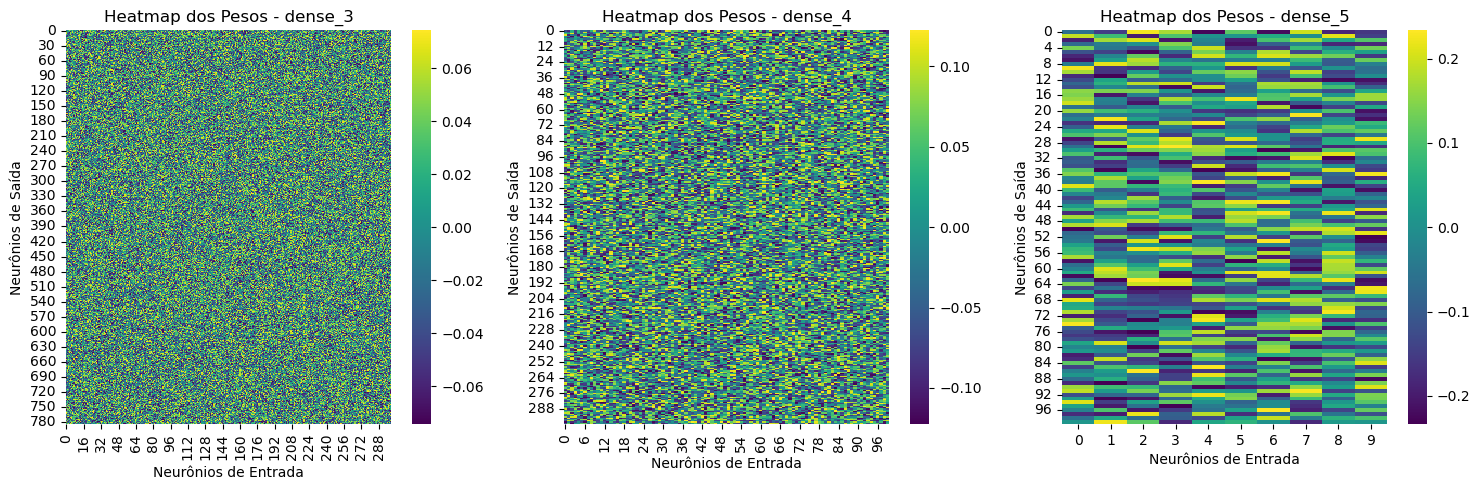

In [28]:
# Crie uma figura com subplots
fig, axes = plt.subplots(1, len(camadas), figsize=(15, 5))

# Itere sobre as camadas e os eixos
for ax, key in zip(axes, camadas):
    pesos = parameters[key]['Pesos']
    
    # Crie um gráfico de calor no eixo correspondente
    sns.heatmap(pesos, cmap='viridis', annot=False, ax=ax)
    ax.set_xlabel('Neurônios de Entrada')
    ax.set_ylabel('Neurônios de Saída')
    ax.set_title(f'Heatmap dos Pesos - {key}')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.show()

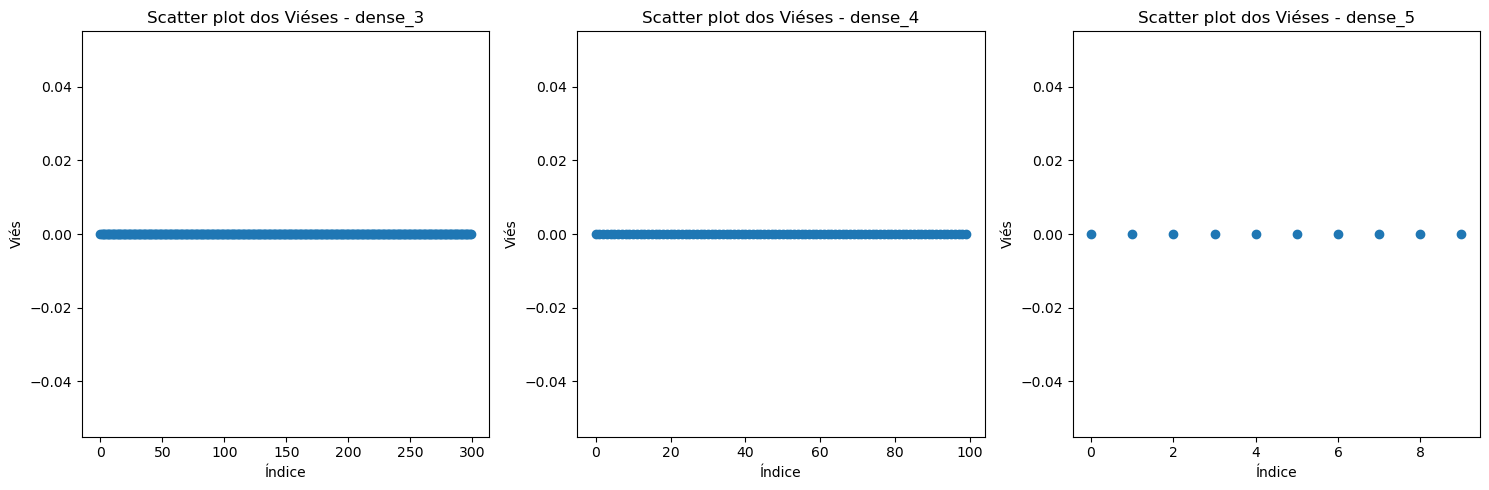

In [29]:
# Crie uma figura com subplots
fig, axes = plt.subplots(1, len(camadas), figsize=(15, 5))

# Itere sobre as camadas e os eixos
for ax, key in zip(axes, camadas):
    vieses = parameters[key]['Viés']
    indice = np.arange(len(vieses))
    
    # Plote os dados no eixo correspondente
    ax.scatter(indice, vieses)
    ax.set_xlabel('Índice')
    ax.set_ylabel('Viés')
    ax.set_title(f'Scatter plot dos Viéses - {key}')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Note, inclusive ficando claso pelos pesos e viéses, que não treinamos o nosso modelo. Apenas criação criamos a estrutura do modelo empirico. Mas nada foi ajustado mediante os dados.

# Compilando o Modelo

Após a criação de um modelo, você deve chamar seu método `compile()` para especificar a **função de perda**, (função objetivo), e o **otimizador** a ser usado. **Opcionalmente**, você também pode especificar uma **lista de métricas** extras para calcular durante o treinamento e a avaliação.

## Arcabouço Teórico:

Dentro do *mundo* de **Machine Learning** esses dois conceitos são importantissimos para a construção de um modelo eficiente. A [**função perda**](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_de_perda#:~:text=Na%20otimiza%C3%A7%C3%A3o%20matem%C3%A1tica%2C%20estat%C3%ADstica%2C%20teoria,%22custo%22%20associado%20ao%20evento.), **função objetivo**, ou **função custo**, pode ser entendida como a função que *mede* a qualidade do osso modelo. Já o [**otimizador**](https://pt.wikipedia.org/wiki/Otimiza%C3%A7%C3%A3o) é a técnica utilizada para encontrar os *melhores valores* para que a **função perda** resulte no melhor resultado.

### Função Perda:

**Entropia Cruzada - Cross Entropy**

O conceito de **Entropia**, na matemática, nasce com o senhor [Claude Shannon](https://pt.wikipedia.org/wiki/Claude_Shannon) em seu trabalho, [*A Mathematical Theory of Communication*](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf) que descreve conceitos em torno de quantificar quanta informação está presente em um sinal. De modo que definomos a **entropia** como sendo:
$$H = - \sum p_i log(p_i)$$

A **Entropia Cruzada** é uma elaboração do conceito de entropia baseado na ideia de encontrar o parâmetro $\boldsymbol{\theta}$ que minimiza a $distância$ entre a **distribuição empirica** $q(y)$ dos dados observados $y$ e modelo de **distribuição teórica** $Pr(y|\boldsymbol{\theta})$. A $distância$ entre duas distribuições de probabilidade $q(z)$ e $p(z)$ pode ser avaliada usando a [divergência de Kullback-Leibler (KL)](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

$$D_{KL}[q||p]=\int_{-\infty}^\infty{q(z)log[q(z)]}dz-\int_{-\infty}^\infty{q(z)log[p(z)]dz}$$

Desenvolvendo esse calculo de distância, sob determinadas condições, chegamos na formula tradicional de calculo de **Entropia Cruzada**,

$$H(q,p) = -\sum_x p(z)log[q(z)]$$

Aqui, foi implemetado uma variação do **Entropia Cruzada**, a [`SparseCategoricalCrossentropy`](https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function), cuja calcula a **perda de entropia cruzada categórica esparsa**, retornando o valor dessa perda.

* **Argumentos**
    * **y_true:** Valores reais;
    * **y_pred:** Os valores previstos;
    * **from_logits:** Indica se y_pred é esperado ser um tensor de logits. Por padrão, assumimos que y_pred codifica uma distribuição de probabilidade;
    * **ignore_class:** Inteiro opcional. O ID de uma classe a ser ignorada durante o cálculo da perda. Isso é útil, por exemplo, em problemas de segmentação que apresentam uma classe “vazia” (comumente -1 ou 255) em mapas de segmentação. Por padrão (ignore_class=None), todas as classes são consideradas;
    * **axis:** Padrão é -1. A dimensão ao longo da qual a entropia é calculada.


### Otimizador:

### Gradiente Descentende Estocástico - Stocastic Gradient Descent (SGD)

O **Gradiente Descendente Estocástico**, *Stocastic Gradient Descent (SGD)* é uma aprimoramento do **Gradiente Descendente**, primeiro método de otimização de redes neurais. O **Gradiente Descendente** é um otimizador que foi pensado para otimizar **funções convexas**, **o que não conseguimos garantir numa rede neurail**, além de que, **o destino final de um algoritmo de descida do gradiente é totalmente determinado pelo ponto de partida**, (Interpretar uma rede como um Sistema Dinâmico ajuda a entender esse processo).

A ideia do **Gradiente Descendente Estocástico (SGD)** é tenta resolver esse problema adicionando algum **ruído** (aleatoriedade) ao gradiente em cada passo. A solução ainda se move para baixo em média, mas em qualquer iteração dada, a direção escolhida não é necessariamente a direção de descida mais íngreme. De fato, pode não ser uma descida de forma alguma. O algoritmo SGD tem a possibilidade de se mover temporariamente para cima e, portanto, pular de um “vale” da função de perda para outro. Devido à quantidade de parâmetros e, com isso, à alta dimensão do espaço vetorial gerado pela rede, torna-se probabilisticamente possível otimizar uma função, ou seja, encontrar seu mínimo global, ainda que ela não seja convexa, utilizando esse método.

#### Introduzindo Aleatóriedade

O mecanismo para introduzir aleatoriedade é simples. Em **cada iteração**, o algoritmo escolhe um **subconjunto aleatório dos dados de treinamento** e **calcula o gradiente apenas a partir desses exemplos**. Esse subconjunto é conhecido como ***minibatch*** ou simplesmente *batch*. A regra de atualização para os parâmetros do modelo $\phi_t$ na iteração $t$ é a seguinte:

$$\phi_{t+1} \leftarrow \phi_t-\alpha \sum_{i \in \mathbb{B}_t} \frac{\partial\mathcal{l}_i[\phi_t]}{\partial\phi}$$

onde,

* $\mathbb{B}_t$ é um conjunto contendo os índices dos pares de entrada/saída no batch atual;
* $\mathcal{l}_i$ é a perda devido ao i-ésimo par;
* $\alpha$ é a taxa de aprendizado (*learning rate*) e, juntamente com a magnitude do gradiente, determina a distância movida em cada iteração.

***batches***

Os *batches* geralmente são extraídos do conjunto de dados **sem reposição**. O algoritmo percorre os exemplos de treinamento até usar todos os dados, momento em que começa a amostrar novamente do conjunto de dados de treinamento completo. Uma única passagem por todo o conjunto de dados de treinamento é chamada de época. Um *batch* pode ser tão pequeno quanto um único exemplo ou tão grande quanto todo o conjunto de dados. Este último caso é chamado de descida do gradiente em *batch* completo e é idêntico à descida do gradiente regular (não estocástica).

#### Propriedades do SGD

1. Embora adicione **ruído** (aleatoriedade) à trajetória, ele ainda melhora o ajuste a um subconjunto dos dados em cada iteração. Portanto, as atualizações tendem a ser sensatas, mesmo que não sejam ótimas.

2. Porque seleciona exemplos de treinamento **sem reposição** e itera através do **conjunto de dados**, todos os exemplos de treinamento ainda contribuem igualmente. 

3. É **menos dispendioso computacionalmente** calcular o gradiente a partir de apenas um subconjunto dos dados de treinamento.

4. Ele pode (em princípio) escapar de mínimos locais.

5. Reduz as chances de ficar preso perto de **pontos de sela**, pontos onde o gradiente descentende trava; é provável que pelo menos alguns dos possíveis *batches* tenham um gradiente significativo em qualquer ponto da função de perda.
  
6. Finalmente, há algumas evidências de que o SGD encontra parâmetros para redes neurais que as fazem generalizar bem para novos dados na prática (Tema melhor abordado na parte de **Regularização Implicita**).

O SGD **não necessariamente "converge" no sentido tradicional**. No entanto, a esperança é que, quando estivermos próximos do mínimo global, todos os pontos de dados serão bem descritos pelo modelo. Consequentemente, o gradiente será pequeno, independentemente do *batch* escolhido, e os parâmetros deixarão de mudar significativamente. Na prática, o SGD é frequentemente aplicado com um cronograma de **taxa de aprendizado**. 

#### Taxa de aprendizado - Learning Rate

A taxa de aprendizado $\alpha$ começa em um valor alto e é diminuída por um fator constante a cada $N$ épocas. A lógica é que, nas primeiras etapas do treinamento, queremos que o algoritmo explore o espaço de parâmetros, saltando de vale em vale para encontrar uma região sensata. Nas etapas posteriores, estamos aproximadamente no lugar certo e estamos mais preocupados em ajustar finamente os parâmetros, então diminuímos $\alpha$ para fazer mudanças menores.

In [30]:
# Intanciando Compilador do modelo:
model.compile(loss="sparse_categorical_crossentropy", # Função Objetivo
              optimizer="sgd", # Otimizador (Gradiente Descendente Estocástico)
              metrics=["accuracy"]) # Métrica de Validação Acurácia.

## Funções Utilizadas

A utilização de `loss="sparse_categorical_crossentropy"` é equivalente a `loss=keras.losses.sparse_categorical_crossentropy`. Similmente, `optimizer="sgd"` é equivalente a `optimizer=keras.optimizers.SGD()` e `metrics=["accuracy"]` é equivalente a `metrics=keras.metrics.sparse_categorical_accuracy]` (quando utilizar esta perda).

Para mais informação sobre as opções do Keras:

* https://keras.io/losses/;
* https://keras.io/optimizers/; e
* https://keras.io/metrics/.

### Justificativa das escolhas

#### Função Custo

Usamos a perda `sparse_categorical_crossentropy` porque temos rótulos esparsos (ou seja, para cada instância há apenas um índice de classe alvo, de 0 a 9 neste caso), e as classes são exclusivas. Se, em vez disso, tivéssemos uma probabilidade alvo por classe para cada instância (como vetores one-hot, por exemplo, [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] para representar a classe 3), então precisaríamos usar a perda `categorical_crossentropy`. Se estivéssemos fazendo classificação binária (com um ou mais rótulos binários), então usaríamos a função de ativação `sigmoid` (ou seja, logística) na camada de saída em vez da função de ativação `softmax`, e usaríamos a perda `binary_crossentropy`.

Caso se queria converter rótulos esparsos (ou seja, índices de classe) para rótulos de vetor one-hot, você pode usar a função `keras.utils.to_categorical()`. Para fazer o contrário, você pode simplesmente usar a função `np.argmax()` com `axis=1`.

#### Otimizador

Em segundo lugar, em relação ao otimizador, `"sgd"` significa simplesmente que treinaremos o modelo usando a **Descida do Gradiente Estocástico simples**. Em outras palavras, o Keras executará o algoritmo de retropropagação descrito anteriormente (ou seja, **autodiff em modo reverso** + **Descida do Gradiente**). Discutiremos otimizadores mais eficientes em outras oportunidades (eles melhoram a parte da Descida do Gradiente, não o autodiff).

# Treinamento e avaliação do modelo:

Construído todo a estrutura de treinamento, podemos então ajustar o modelo. Para isso, basta usar o método `fit()`. Lembrando que treinamos o modelo com o os dados de treino e validamos a otimização dos hiperparâmetros com os dados de validação. 

In [31]:
# Treinando o modelo:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7288 - accuracy: 0.7577 - val_loss: 0.5280 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4921 - accuracy: 0.8289 - val_loss: 0.4417 - val_accuracy: 0.8554
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4462 - accuracy: 0.8438 - val_loss: 0.4468 - val_accuracy: 0.8424
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4172 - accuracy: 0.8543 - val_loss: 0.4366 - val_accuracy: 0.8472
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3984 - accuracy: 0.8605 - val_loss: 0.4037 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8674 - val_loss: 0.4015 - val_accuracy: 0.8548
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3686 - accuracy: 0.8696 - val_loss: 0.3758 - val_accuracy:

**Utilização do Conjunto Validação**

Também passamos um conjunto de validação (isso é opcional): o Keras medirá a perda e as métricas extras nesse conjunto ao final de cada época, o que é muito útil para ver como o modelo realmente está se saindo: se o desempenho no conjunto de treinamento for muito melhor do que no conjunto de validação, seu modelo provavelmente está sofrendo de *overfitting* (ou há um bug, como uma incompatibilidade de dados entre o conjunto de treinamento e o conjunto de validação).

In [32]:
# Metrica do modelo:
metricas=model.evaluate(X_test, y_test);metricas

313/313 [==============================] - 1s 1ms/step - loss: 68.5924 - accuracy: 0.8394


[68.59242248535156, 0.8393999934196472]

In [33]:
# Importando Pandas
import pandas as pd
from matplotlib import pyplot as plt

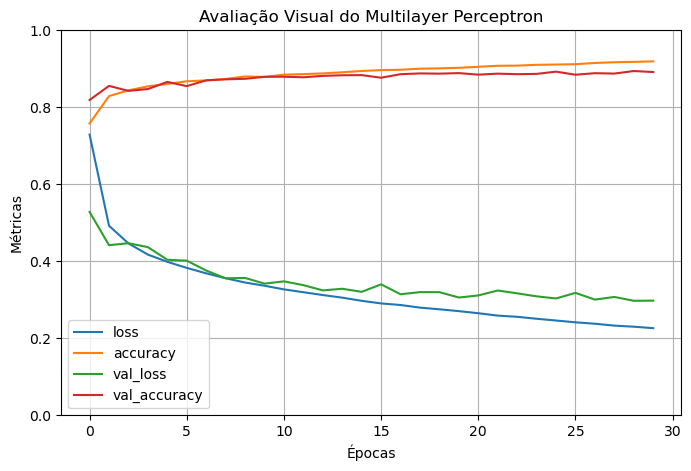

In [34]:
# Avaliação Visual do Modelo:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.title("Avaliação Visual do Multilayer Perceptron")
plt.grid(True)
plt.gca().set_ylim(0, 1) # definindo o intervalo vertical para [0-1]
plt.xlabel("Épocas")
plt.ylabel("Métricas")
#plt.legend([f"loss: {round(metricas[0],2)}",f"Acurácia: {round(metricas[1],2)}"])
plt.show()

# Usando o modelo para fazer previsões

Finalmente então, podemos fazer predição com o modelo, utilizando o método `predict()` com novas instâncias.

In [35]:
# Simulando novas instâncias:
X_new = X_test[:3]

y_proba = model.predict(X_new)

1/1 [==============================] - 0s 89ms/step


In [36]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

1/1 [==============================] - 0s 22ms/step


In [38]:
# classes
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')